In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [178]:
df_socmed = pd.read_csv('hookit_data_sept17.csv', index_col=0, header=0, parse_dates=True)
df_playerdata = pd.read_csv('player_data_Sept2017.csv', index_col=0, parse_dates=True)

In [179]:
df_playerdata['Name'].replace(
    to_replace=['Neymar'],
    value='Neymar da Silva',
    inplace=True
)



In [187]:
print(df_playerdata.loc[df_playerdata['Name'] == 'Modric'])
print(df_socmed.loc[df_socmed['name'] == 'Modric'])

Empty DataFrame
Columns: [Name, Date.of.birth, Place.of.birth, Age, Height, Shoe.size, Nationality, Position, Foot, Current.club, Current.market.value, Highest.market.value, City.of.birth, Country.of.birth, Birth.country.code, Continent, Continent.specific]
Index: []
Empty DataFrame
Columns: [name, facebook, twitter, instagram, total_followers, new_followers_month, posts, interactions_likes_comments_retweets]
Index: []


In [189]:
df_socmedtop100 = df_socmed.head(n=100)
df_socmedtop100 = df_socmedtop100.sort_values(by=['name'])
print(df_socmedtop100)


                         name     facebook     twitter    instagram  \
89             Alexis Sanchez    4941472.0   2351324.0    7096550.0   
20              Alvaro Morata    7550830.0   3968453.0    7404470.0   
15             Andres Iniesta   27039865.0  18777628.0   19676633.0   
69            Anthony Martial    1009227.0   1050450.0    4338984.0   
13          Antoine Griezmann    7057771.0   4426445.0   13154977.0   
83           Antonio Valencia       6740.0    623282.0    1475854.0   
34               Arturo Vidal    2040409.0   3507228.0    4343627.0   
25            Bafetimbi Gomis     426593.0    731738.0     631544.0   
40             Benjamin Mendy          NaN    478109.0     723194.0   
52             Blaise Matuidi    2077574.0   2013493.0    2492418.0   
28                   Casemiro    4167343.0   1206868.0    6088494.0   
79          Claudio Marchisio    2598987.0   1720185.0    3217649.0   
0           Cristiano Ronaldo  122586009.0  60370888.0  112346228.0   
22    

In [145]:
df_playervalue = df_playerdata.sort_values(['Current.market.value'], ascending=[False])
df_playervalue = df_playervalue[['Name','Current.market.value']]
df_mktvaltop100 = df_playervalue.head(n=100)
df_mktvaltop100 = df_mktvaltop100.sort_values(by=['Name'])
print(df_mktvaltop100)

                           Name  Current.market.value
93                 Aaron Ramsey            35000000.0
4292                Alex Sandro            35000000.0
102         Alexandre Lacazette            50000000.0
98               Alexis Sanchez            65000000.0
46                Alvaro Morata            50000000.0
4541             Andrea Belotti            30000000.0
2211             Angel Di Maria            40000000.0
1259          Antoine Griezmann            80000000.0
3259               Arturo Vidal            35000000.0
8                Benjamin Mendy            30000000.0
20               Bernardo Silva            40000000.0
4296             Blaise Matuidi            30000000.0
1200                   Casemiro            30000000.0
40                Cesc Fabregas            35000000.0
124           Christian Eriksen            40000000.0
1207          Cristiano Ronaldo           100000000.0
1198            Daniel Carvajal            32000000.0
3252                David Al

In [196]:
df_alltop = pd.merge(left=df_socmedtop100[['name']],
                     right=df_mktvaltop100[['Name']], 
                     left_on='name',
                     right_on='Name',
                     how='inner')
print (df_alltop)


                         name                       Name
0              Alexis Sanchez             Alexis Sanchez
1               Alvaro Morata              Alvaro Morata
2           Antoine Griezmann          Antoine Griezmann
3                Arturo Vidal               Arturo Vidal
4              Benjamin Mendy             Benjamin Mendy
5              Blaise Matuidi             Blaise Matuidi
6                    Casemiro                   Casemiro
7           Cristiano Ronaldo          Cristiano Ronaldo
8                David de Gea               David de Gea
9                 Eden Hazard                Eden Hazard
10             Edinson Cavani             Edinson Cavani
11              Gabriel Jesus              Gabriel Jesus
12                Gareth Bale                Gareth Bale
13               Granit Xhaka               Granit Xhaka
14                 Harry Kane                 Harry Kane
15         Henrikh Mkhitaryan         Henrikh Mkhitaryan
16                       Isco  

In [94]:
df_playerdata_merge = pd.merge(left=df_playerdata,right=df_socmed, left_on='Name', right_on='name')

In [95]:
df_playerdata_merge

,Name,Date.of.birth,Place.of.birth,Age,Height,Shoe.size,Nationality,Position,Foot,Current.club,...,Continent,Continent.specific,name,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets
0,Benjamin Mendy,"Jul 17, 1994","Longjumeau, France",23,1.85,NaN,"France, Senegal",Defence - Left-Back,left,Manchester City,...,Europe,Western Europe,Benjamin Mendy,NaN,478109.0,723194.0,1201303,275900.0,168.0,4400000.0
1,Leroy Sane,"Jan 11, 1996","Essen, Germany",21,1.84,NaN,"Germany, France",Striker - Left Wing,left,Manchester City,...,Europe,Central Europe,Leroy Sane,311793.0,184615.0,1253264.0,1749672,143500.0,52.0,1900000.0
2,Sergio Aguero,"Jun 2, 1988","Buenos Aires, Argentina",29,1.73,NaN,"Argentina, Spain",Striker - Centre-Forward,right,Manchester City,...,South America,South,Sergio Aguero,11083383.0,12115007.0,7432927.0,30631317,356700.0,47.0,2800000.0
3,Gabriel Jesus,"Apr 3, 1997","Sao Paulo, Brazil",20,1.75,NaN,Brazil,Striker - Centre-Forward,right,Manchester City,...,South America,Brazil,Gabriel Jesus,NaN,NaN,NaN,0,NaN,NaN,NaN
4,Thibaut Courtois,"May 11, 1992","Bree, Belgium",25,1.99,NaN,Belgium,Goalkeeper,left,Chelsea FC,...,Europe,Central Europe,Thibaut Courtois,5428743.0,1891584.0,4027589.0,11347916,130600.0,64.0,2900000.0
5,David Luiz,"Apr 22, 1987","Diadema, Brazil",30,1.89,NaN,"Brazil, Portugal",Defence - Centre-Back,both,Chelsea FC,...,South America,Brazil,David Luiz,25924523.0,8604135.0,17190690.0,51719348,38500.0,40.0,7100000.0
6,Eden Hazard,"Jan 7, 1991","La Louviere, Belgium",26,1.73,NaN,Belgium,Striker - Left Wing,both,Chelsea FC,...,Europe,Central Europe,Eden Hazard,8938343.0,5125924.0,10528208.0,24592475,507800.0,25.0,10600000.0
7,Alvaro Morata,"Oct 23, 1992","Madrid, Spain",24,1.89,NaN,Spain,Striker - Centre-Forward,right,Chelsea FC,...,Europe,Southern Europe,Alvaro Morata,7550830.0,3968453.0,7404470.0,18923753,398800.0,37.0,8500000.0
8,Michy Batshuayi,"Oct 2, 1993","Brussel, Belgium",23,1.85,NaN,"Belgium, Congo DR",Striker - Centre-Forward,both,Chelsea FC,...,Europe,Central Europe,Michy Batshuayi,773965.0,905794.0,1262900.0,2942659,159900.0,78.0,3300000.0
9,David de Gea,"Nov 7, 1990","Madrid, Spain",26,1.89,NaN,Spain,Goalkeeper,right,Manchester United,...,Europe,Southern Europe,David de Gea,6639054.0,8951138.0,7554932.0,23145124,638600.0,41.0,4100000.0


In [96]:
df_playerdata_merge[['Name', 'Current.market.value', 'Highest.market.value', 'facebook', 'twitter', 'instagram', 'total_followers']]

,Name,Current.market.value,Highest.market.value,facebook,twitter,instagram,total_followers
0,Benjamin Mendy,30000000.0,30000000.0,NaN,478109.0,723194.0,1201303
1,Leroy Sane,35000000.0,35000000.0,311793.0,184615.0,1253264.0,1749672
2,Sergio Aguero,65000000.0,65000000.0,11083383.0,12115007.0,7432927.0,30631317
3,Gabriel Jesus,30000000.0,30000000.0,NaN,NaN,NaN,0
4,Thibaut Courtois,40000000.0,40000000.0,5428743.0,1891584.0,4027589.0,11347916
5,David Luiz,30000000.0,30000000.0,25924523.0,8604135.0,17190690.0,51719348
6,Eden Hazard,75000000.0,75000000.0,8938343.0,5125924.0,10528208.0,24592475
7,Alvaro Morata,50000000.0,50000000.0,7550830.0,3968453.0,7404470.0,18923753
8,Michy Batshuayi,25000000.0,25000000.0,773965.0,905794.0,1262900.0,2942659
9,David de Gea,40000000.0,40000000.0,6639054.0,8951138.0,7554932.0,23145124


In [97]:
df_playerdata_merge.describe()

,Height,Shoe.size,Current.market.value,Highest.market.value,facebook,twitter,instagram,total_followers,new_followers_month,posts,interactions_likes_comments_retweets
count,80.000000,5.000000,8.000000e+01,8.000000e+01,7.300000e+01,7.400000e+01,7.800000e+01,8.000000e+01,7.900000e+01,79.000000,7.900000e+01
mean,1.816750,10.400000,3.522812e+07,4.442812e+07,1.053327e+07,4.606553e+06,1.027926e+07,2.389495e+07,3.708058e+05,50.202532,1.082911e+07
std,0.065907,1.294218,2.680500e+07,2.431971e+07,1.941711e+07,8.492922e+06,1.806572e+07,4.332905e+07,5.984734e+05,28.825905,2.994369e+07
min,1.690000,8.500000,5.000000e+05,2.500000e+06,6.740000e+03,8.900000e+01,1.170500e+04,0.000000e+00,-7.000000e+03,9.000000,1.900000e+06
25%,1.760000,10.000000,1.200000e+07,3.000000e+07,1.169228e+06,7.886948e+05,2.481908e+06,3.900298e+06,8.280000e+04,30.500000,2.500000e+06
50%,1.825000,10.500000,3.150000e+07,4.000000e+07,4.689963e+06,1.919138e+06,4.821394e+06,1.140531e+07,1.836000e+05,47.000000,3.500000e+06
75%,1.860000,11.000000,5.000000e+07,5.625000e+07,9.474324e+06,4.331352e+06,1.026958e+07,2.176049e+07,4.000000e+05,63.500000,6.700000e+06
max,1.990000,12.000000,1.200000e+08,1.200000e+08,1.225860e+08,6.037089e+07,1.123462e+08,2.953031e+08,4.300000e+06,168.000000,2.335000e+08


In [98]:
#sort values by market value 
df_sortmarket = df_playerdata_merge.sort_values(['Current.market.value'], ascending=[False])
df_sortmarket = df_sortmarket[['Name','Current.market.value']]
df_sortmarket.head(n=20)


,Name,Current.market.value
43,Lionel Messi,120000000.0
48,Neymar da Silva,100000000.0
32,Cristiano Ronaldo,100000000.0
44,Luis Suarez,90000000.0
60,Robert Lewandowski,80000000.0
33,Gareth Bale,80000000.0
45,Antoine Griezmann,80000000.0
6,Eden Hazard,75000000.0
11,Paul Pogba,75000000.0
28,Toni Kroos,70000000.0


In [99]:
df_sortfollowers = df_playerdata_merge.sort_values(['total_followers'], ascending=[False])
df_sortfollowers = df_sortfollowers[['Name','total_followers']]
df_sortfollowers.head(n=20)

,Name,total_followers
32,Cristiano Ronaldo,295303125
48,Neymar da Silva,176217584
43,Lionel Messi,170259880
58,James Rodriguez,79961391
33,Gareth Bale,75149723
40,Andres Iniesta,65494126
19,Mesut Ozil,64192643
17,Zlatan Ibrahimovic,59417527
44,Luis Suarez,55211293
5,David Luiz,51719348


In [ ]:
#sort values by followers
# put first ten rows of these two side by side

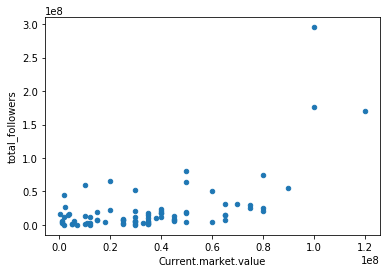

In [100]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='total_followers')

In [203]:
a, b = np.polyfit(np.array(df_playerdata_merge['Current.market.value']), np.array(df_playerdata_merge['total_followers']), deg=1)
f = lambda x: a*x - b
print(a)
print(b)

0.938341313598
-9161055.46311


In [200]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(df_playerdata_merge['Current.market.value'],df_playerdata_merge['total_followers'])

#fit function
f = lambda x: a*x - b
# x values of line to plot
x = np.array([0,100])
# plot fit
plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")

#better take min and max of x values
x = np.array([min(bill),max(bill)])
plt.plot(x,f(x), c="orange", label="fit line between min and max")

plt.legend()
plt.show()

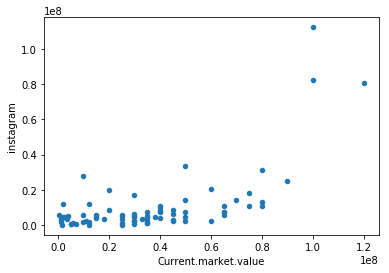

In [101]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='instagram')

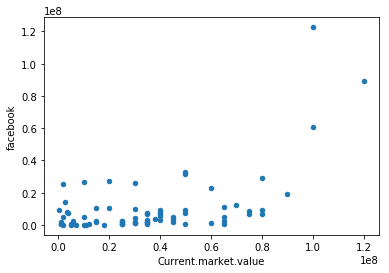

In [102]:
df_playerdata_merge.plot(kind='scatter', x='Current.market.value', y='facebook')

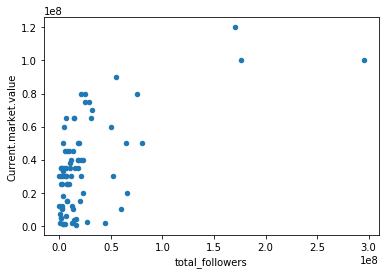

In [103]:
df_playerdata_merge.plot(kind='scatter', x='total_followers', y='Current.market.value')

In [104]:
df_socmedbar = df_playerdata_merge[['facebook', 'twitter', 'instagram']]

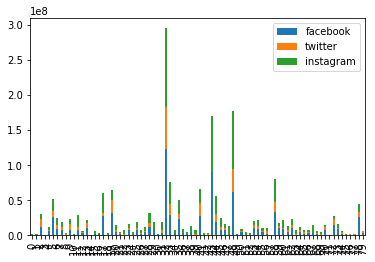

In [105]:
df_socmedbar.plot(kind='bar', stacked=True)

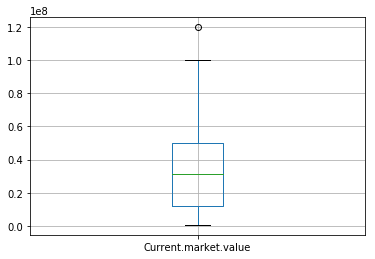

In [106]:
df_playerdata_merge.boxplot(column='Current.market.value')

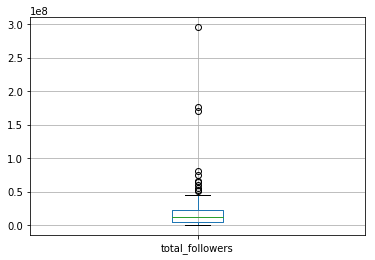

In [107]:
df_playerdata_merge.boxplot(column='total_followers')

In [108]:
sp.stats.ttest_ind(df_playerdata_merge.dropna()['Current.market.value'], df_playerdata_merge.dropna()['total_followers'])

Ttest_indResult(statistic=0.93332941112907897, pvalue=0.40348635097895841)